In [1]:
import os 
os.chdir("..")

%load_ext autoreload
%autoreload 2
from numerics.integration.steps import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numerics.utilities.misc import *
import time
from scipy.special import erf
import pickle
import matplotlib

FREQUENCY

In [132]:
plotdir = "figuras/"
os.makedirs(plotdir, exist_ok=True)

In [15]:
os.getcwd()

'/nfs/pic.es/user/m/mbilkis'

In [20]:
b=4
np.exp(-b)/(np.exp(b) - np.exp(-b))

0.00033557520084124496

In [5]:
mode = "frequencies"
pars = give_def_params_discrimination(flip=0, mode = mode)
params, exp_path = check_params_discrimination(pars)
[gamma1, omega1, n1, eta1, kappa1], [gamma0, omega0, n0, eta0, kappa0] = params

dtt = 1e-6
total_time = 50.
total_time, dt = get_total_time_dt(params, dt=dtt, total_time=total_time)
times = np.arange(0, total_time+ dt, dt)


indis = np.logspace(1,np.log10(len(times)-1), 1000)
indis = [int(k) for k in indis]
timind = [times[ind] for ind in indis]


Ntraj = 2000
boundsB= np.arange(-4,4.1,.1)


path = get_def_path()+"results_stopping_time/paper_{}/".format(mode)
path_data = get_def_path()+"results_stopping_time/paper_{}/".format(mode)


timbin1 = np.load(path_data+"timbin.npy")
cons1 = np.load(path_data+"cons.npy")#, cons1)
timbin0 = np.load(path_data+"timbin.npy")#, timbin0)
cons0 = np.load(path_data+"cons.npy")#, cons0)
gp0 = np.load(path_data+"gp0.npy")#, gp0)
gp1 = np.load(path_data+"gp1.npy")#, gp1)
deter_data_h1_h0 = np.load(path_data+"deth1h0.npy")#, deter_data_h1_h0)
deteR_data_h0_h1 = np.load(path_data+"deth0h1.npy")#, deter_data_h0_h1)
anals0 = np.load(path_data+"anals0.npy")
anals1 = np.load(path_data+"anals1.npy")#,anals1)
#l0 = np.load(path_data+"l0.npy")
#l1 = np.load(path_data+"l1.npy")

In [6]:
l0 = np.load("continuous/l0_freq.npy")
l1 = np.load("continuous/l1_freq.npy")

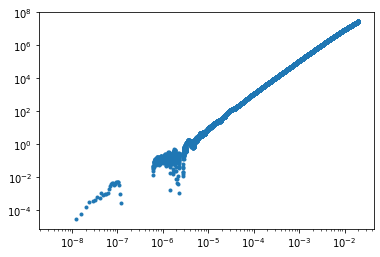

In [38]:
ax=plt.subplot(111)
ax.plot(times,l1[:-1],'.')
ax.set_yscale("log")
ax.set_xscale("log")

In [40]:
indi = np.argmin(np.abs(times - 1e-3))
a, b = np.polyfit(np.log10(times[indi:]), np.log10(l1[indi:][:-1]), 1)

In [42]:
a, b

(1.8115640992269169, 10.555718271690674)

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


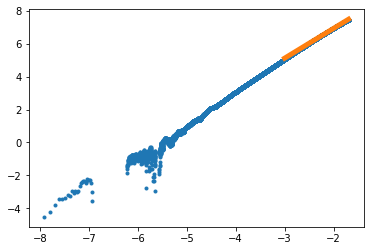

In [44]:
ax=plt.subplot(111)
ax.plot(np.log10(times),np.log10(l1[:-1]),'.')
#ax.set_yscale("log")
#ax.set_xscale("log")
ax.plot(np.log10(times)[indi:], a*np.log10(times[indi:]) + b, linewidth=5)

In [26]:
a

1.8548216201532326

In [27]:
b

10.6418667316619

In [22]:
plt.plot(x, a*x+b)

NameError: name 'x' is not defined

In [18]:
a

1475017252.5668828

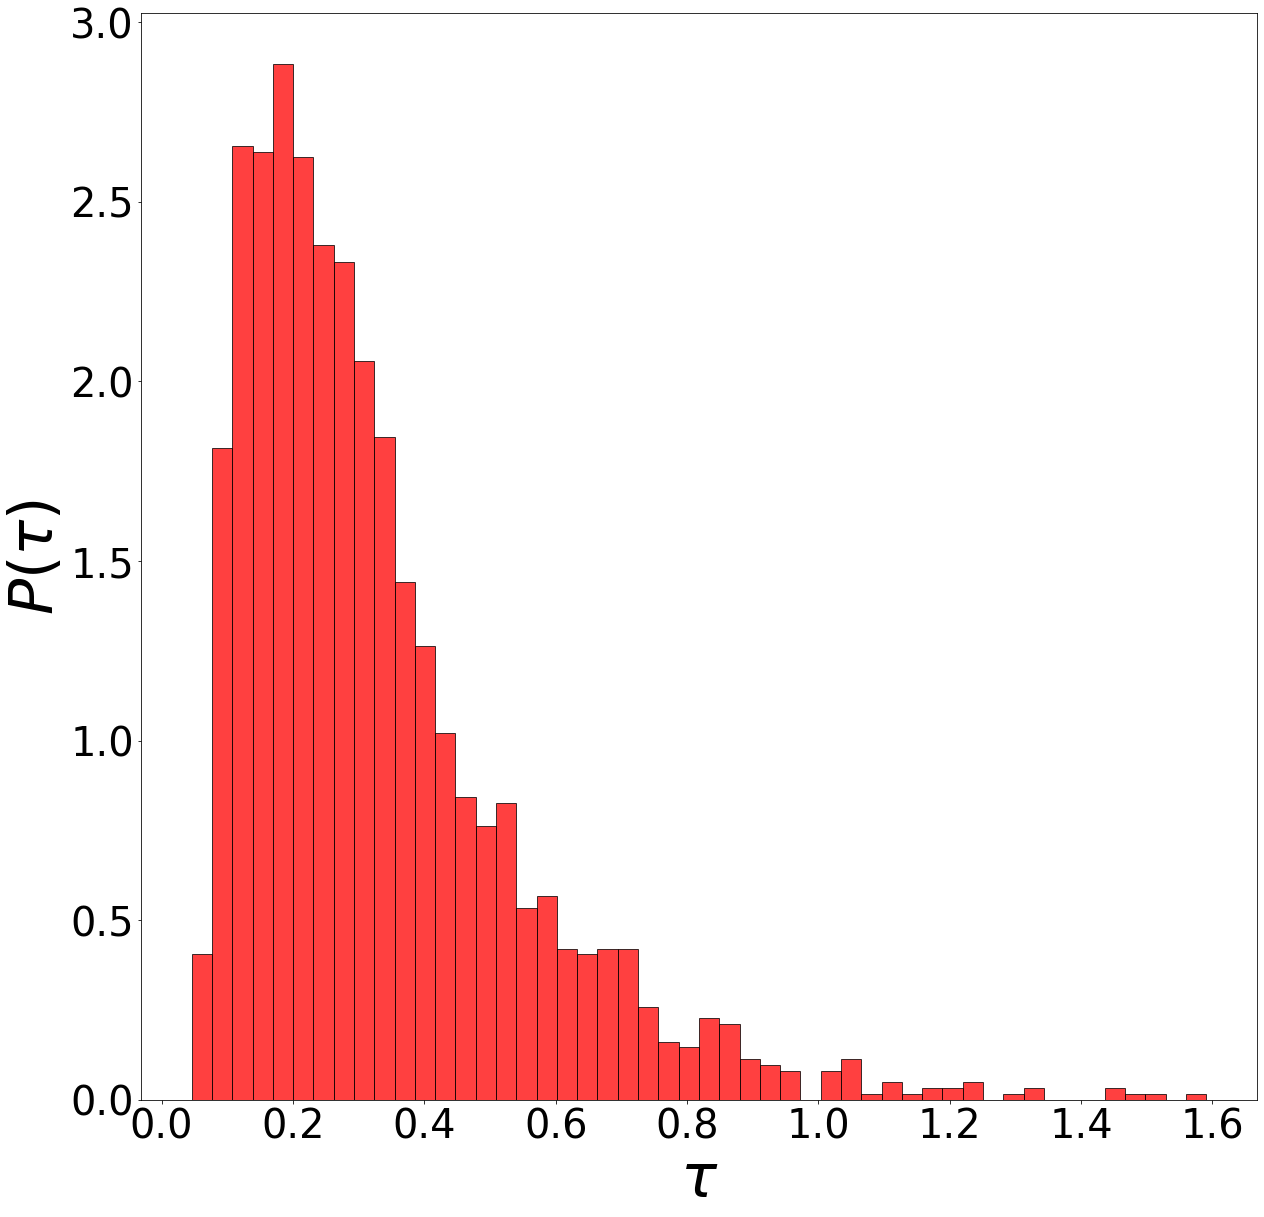

In [69]:
LS, TS = 60, 40
plt.figure(figsize=(20,20))
ax = plt.subplot(111)
indb = -5
ax.bar(timbin1[indb], cons1[indb], width=timbin1[indb][1]-timbin1[indb][0], color="red", alpha=0.75, edgecolor="black",)#, label="simulations")
ax.set_xlabel(r'$\tau$',size=LS)
ax.set_ylabel(r'$P(\tau)$', size=LS)
ax.tick_params(axis='both', which='major', labelsize=TS)
plt.savefig(plotdir+"freq_histogram.pdf")

In [22]:
with open(path_data+"stop.pickle","rb") as f:
    stop = pickle.load( f)#, protocol=pickle.HIGHEST_PROTOCOL)

with open(path_data+"deter.pickle","rb") as f:
    deter = pickle.load(f)#, protocol=pickle.HIGHEST_PROTOCOL)
    
alphas = list(deter["h0/h1"].values())
betas = list(deter["h1/h0"].values())

alphas = np.stack(alphas)
betas = np.stack(betas)

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in tru

Text(0, 0.5, 't')

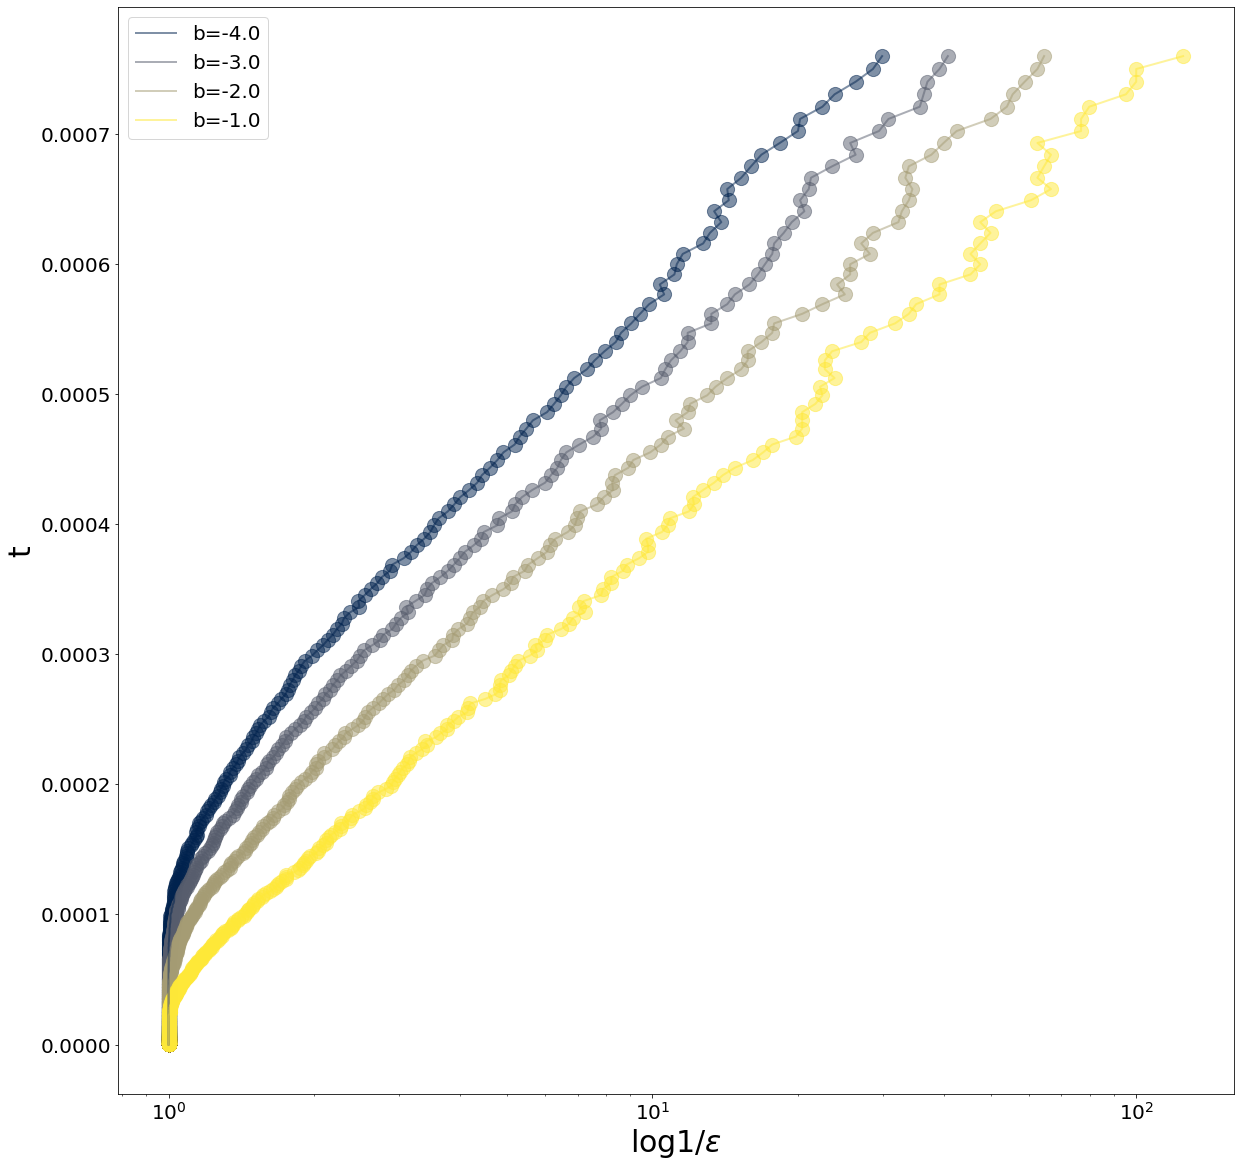

In [23]:
maps = plt.get_cmap("cividis")

LS=30
plt.figure(figsize=(20,20))
#plt.suptitle("some numerics on " + r'$P(H_1|H_0)$', size=20)
ax=plt.subplot(111)
indboundsplot = list(range(0,len(boundsB)))[0:38:10]
boundsplot = [boundsB[int(k)] for k in indboundsplot]
colors = maps(np.linspace(0,1,len(boundsplot)))
c=-1
l=-250
for k, b in zip(indboundsplot, boundsplot):
    c+=1
    ax.scatter((1/betas[k,:])[:l],timind[:l],  color=colors[c], s=200, alpha=0.5)
    ax.plot((1/betas[k,:])[:l],timind[:l],  color=colors[c], linewidth=2, alpha=0.5, label="b={}".format(np.round(b,2)))
    
ax.legend(prop={"size":20})
ax.set_xscale("log")
ax.set_xlabel(r'$\log 1/\epsilon$',size=LS)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_ylabel("t",size=LS)
#plt.savefig(plotdir+"freq_beta.pdf")


/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_lau

Text(0, 0.5, 't')

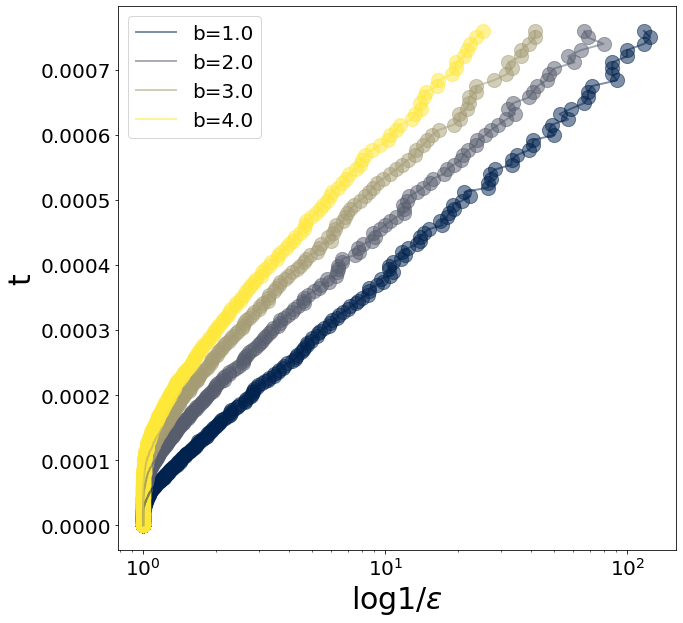

In [24]:
maps = plt.get_cmap("cividis")

plt.figure(figsize=(10,10))

bpos = boundsB[boundsB>=0]
bneg = boundsB[boundsB<0]

#plt.suptitle("some numerics on " + r'$P(H_1|H_0)$', size=20)
ax=plt.subplot(111)
indboundsplot = list(range(0,len(boundsB)))[len(bneg)+10:len(boundsB):10]
boundsplot = [boundsB[int(k)] for k in indboundsplot]
colors = maps(np.linspace(0,1,len(boundsplot)))
c=-1
l=-250
for k, b in zip(indboundsplot, boundsplot):
    c+=1
    ax.scatter((1/alphas[k,:])[:l],timind[:l],  color=colors[c], s=200, alpha=0.5)
    ax.plot((1/alphas[k,:])[:l],timind[:l],  color=colors[c], linewidth=2, alpha=0.5, label="b={}".format(np.round(b,2)))
    
ax.legend(prop={"size":20})
ax.set_xscale("log")
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'$\log 1/\epsilon$',size=LS)
ax.set_ylabel("t",size=LS)
#plt.savefig(plotdir+"freq_alpha.pdf")

In [25]:
dtt = 1e-6
total_time = 50.
pars = give_def_params_discrimination(flip=0, mode = mode)
params, exp_path = check_params_discrimination(pars)
[gamma1, omega1, n1, eta1, kappa1], [gamma0, omega0, n0, eta0, kappa0] = params

total_time, dt = get_total_time_dt(params, dt=dtt, total_time=total_time)
times = np.arange(0, total_time+ dt, dt)
log_lik_ratio, log_lik_ratio_swap = load_liks(itraj=10, mode=mode, dtt=dt, total_time_in=total_time)

In [74]:
ll1={}
ll0={}
for k in range(1,5):
    ll1[k], ll0[k] = load_liks(itraj=k, mode=mode, dtt=dt, total_time_in=total_time)
    

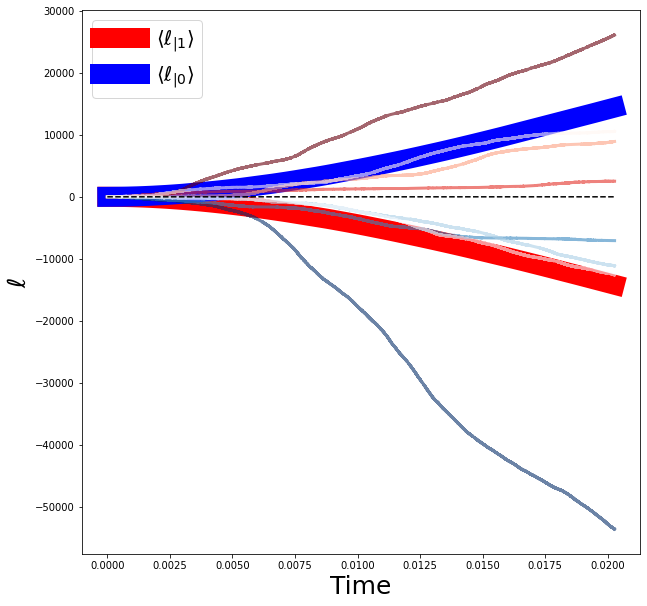

In [90]:
colors1 = plt.get_cmap("Reds")
colors0 = plt.get_cmap("Blues")
Ntraj = 4
Ltraj=3
c1 = colors1(np.linspace(0,1,Ntraj))[::-1]
c0 = colors0(np.linspace(0,1,Ntraj))[::-1]

plt.figure(figsize=(10,10))
ax=plt.subplot(111)
ax.plot(times,l0[:-1]/1805, color="red", linewidth=20, label=r'$\langle \ell_{|1} \rangle$')
ax.plot(times,l1[:-1]/1805, color="blue", linewidth=20, label=r'$\langle \ell_{|0} \rangle$')
for ind,k in enumerate(range(1,5)):
    ax.plot(times,ll1[k][:-1], color=c1[ind], linewidth=Ltraj, alpha=0.6)
    ax.plot(times,ll0[k][:-1], color=c0[ind], linewidth=Ltraj, alpha=0.6)   
ax.plot(times, np.zeros(len(times)), '--', color="black")
ax.set_xlabel("Time", size=LS)
ax.set_ylabel(r'$\ell$', size=LS)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.legend(prop={"size":20})
plt.savefig(plotdir+"liks_freq.pdf")

In [26]:

bpos = boundsB[boundsB>=0]
bneg = boundsB[boundsB<0]

avg_err_alpha = lambda o: (1-np.exp(-abs(o)))/(np.exp(abs(o)) - np.exp(-abs(o)))
avg_err_beta = lambda o :(1-np.exp(-abs(o)))/(np.exp(abs(o)) - np.exp(-abs(o)))

errs = np.array([avg_err_alpha(b) for b in boundsB]) #
tot_err = 0.5*(alphas+betas)#0.5*(alphas + betas)
times_to_errs = [timind[np.argmin(np.abs(tot_err[indb,:] - errs[indb]))] for indb in range(len(bpos))]



stops0 = [[] for k in range(len(bpos))]
stops1 = [[] for k in range(len(bpos))]

values1 = list(stop["_1"].values())
values0 = list(stop["_0"].values())
for k,val in enumerate(values1):
    if len(val)!=0:
        for indb in range(len(val)):
            if ~np.isnan([values1[k][indb]])[0] == True:
                stops1[indb].append(np.squeeze(values1[k][indb]))
        
for k,val in enumerate(values0):
    if len(val)!=0:
        for indb in range(len(val)):
            if ~np.isnan([values0[k][indb]])[0] == True:
                stops0[indb].append(np.squeeze(values0[k][indb]))


avg_times1 = np.array([np.mean(k) for k in stops1])
avg_times0 = np.array([np.mean(k) for k in stops0])

std_times1 = np.array([np.std(k) for k in stops1])
std_times0 = np.array([np.std(k) for k in stops0])
avg_times = 0.5*(avg_times0 + avg_times1)

std_times = np.sqrt(std_times1**2   + std_times0**2)#0.5*(np.array(avg_times0) + np.array(avg_times1) )
stoch = avg_times
stoch_std = std_times


avg_err_alpha = lambda o: (1-np.exp(-o))/(np.exp(o) - np.exp(-o))
errs = [avg_err_alpha(b) for b in bpos]
times_alpha_to_errB = [timind[np.argmin(np.abs(alphas[indb+len(bneg),:]+betas[len(bneg)-indb+1,:] - errs[indb]))] for indb in range(len(bpos))]

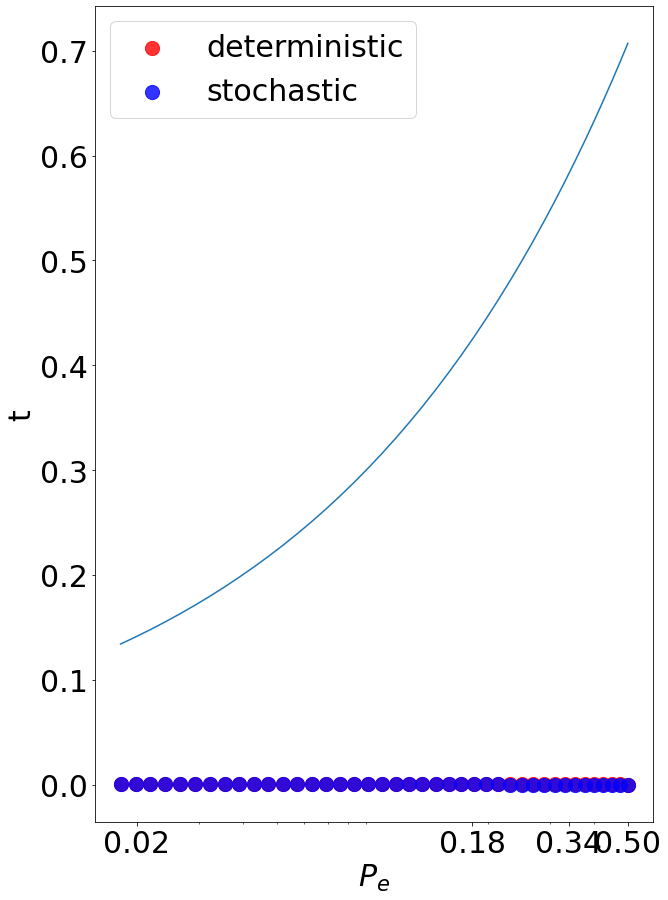

In [39]:

fig = plt.figure(figsize=(10,15))
ax = plt.subplot(111)
lw=10
TS=30
ax.scatter(errs, times_alpha_to_errB,color="red", alpha=0.8,s=200, label="deterministic")
ax.scatter(errs, stoch ,color="blue",s=200,  alpha=0.8,label="stochastic")
ax.plot(errs, np.sqrt(errs))

#ax.fill_between(errs, stoch - stoch_std/2, stoch + stoch_std/2, alpha=0.5, color="blue")
ax.set_xscale("log")
ax.set_xticks([np.round(k,2) for k in np.linspace(min(errs),max(errs),4)])
ax.set_xlabel(r'$P_e$', size=LS)
ax.tick_params(axis='both', which='major', labelsize=TS)
ax.set_ylabel("t", size=LS)
ax.legend(prop={"size":LS})
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.savefig(plotdir+"freq_adaptive_vs_det.pdf")




DAMPING

In [2]:
mode = "damping"
pars = give_def_params_discrimination(flip=0, mode = mode)
params, exp_path = check_params_discrimination(pars)
[gamma1, omega1, n1, eta1, kappa1], [gamma0, omega0, n0, eta0, kappa0] = params


dtt = 1e-6
total_time = 6.
total_time, dt = get_total_time_dt(params, dt=dtt, total_time=total_time)
times = np.arange(0, total_time+ dt, dt)


indis = np.logspace(1,np.log10(len(times)-1), 1000)
indis = [int(k) for k in indis]
timind = [times[ind] for ind in indis]


Ntraj = 2000
boundsB= np.arange(-4,4.1,.1)


path = get_def_path()+"results_stopping_time/paper_{}/".format(mode)
path_data = get_def_path()+"results_stopping_time/paper_{}/".format(mode)


timbin1 = np.load(path_data+"timbin.npy")
cons1 = np.load(path_data+"cons.npy")#, cons1)
timbin0 = np.load(path_data+"timbin.npy")#, timbin0)
cons0 = np.load(path_data+"cons.npy")#, cons0)
gp0 = np.load(path_data+"gp0.npy")#, gp0)
gp1 = np.load(path_data+"gp1.npy")#, gp1)
deter_data_h1_h0 = np.load(path_data+"deth1h0.npy")#, deter_data_h1_h0)
deteR_data_h0_h1 = np.load(path_data+"deth0h1.npy")#, deter_data_h0_h1)
anals0 = np.load(path_data+"anals0.npy")
anals1 = np.load(path_data+"anals1.npy")#,anals1)
l0 = np.load(path_data+"l0.npy")
l1 = np.load(path_data+"l1.npy")

In [3]:
ll1={}
ll0={}
for k in range(1,5):
    ll1[k], ll0[k] = load_liks(itraj=k, mode=mode, dtt=dt, total_time_in=total_time)
    

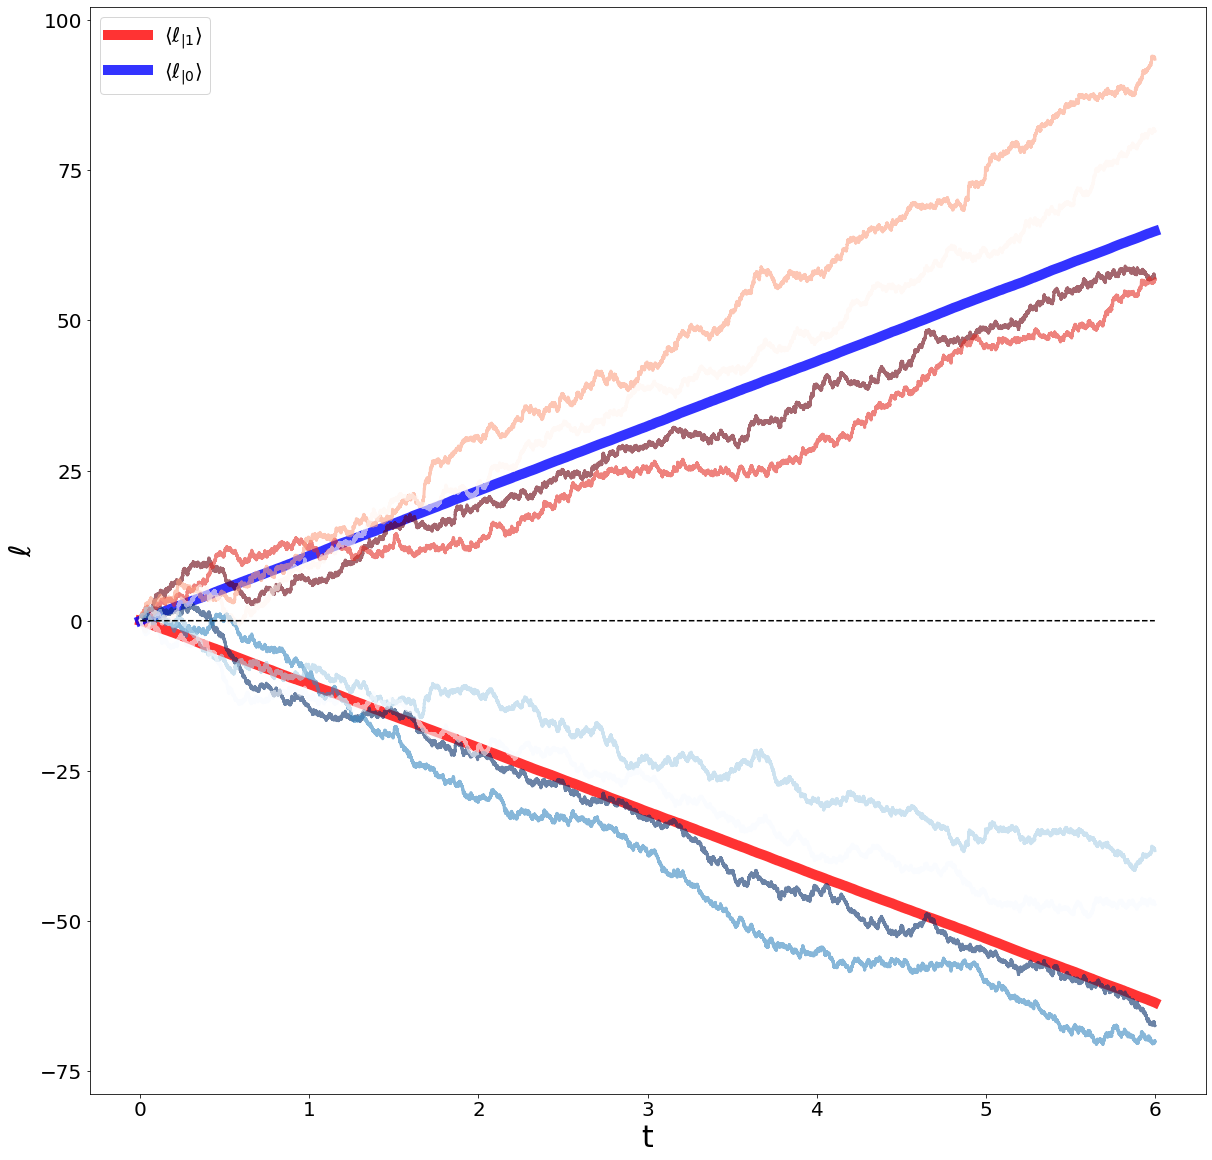

In [49]:
colors1 = plt.get_cmap("Reds")
colors0 = plt.get_cmap("Blues")
Ntraj = 4
Ltraj=3
LS=30
c1 = colors1(np.linspace(0,1,Ntraj))[::-1]
c0 = colors0(np.linspace(0,1,Ntraj))[::-1]

jump = 100
plt.figure(figsize=(20,20))
ax=plt.subplot(111)
ax.plot(times[::jump],l0[:-1][::jump], color="red", alpha=0.8, linewidth=10, label=r'$\langle \ell_{|1} \rangle$')
ax.plot(times[::jump],l1[:-1][::jump], color="blue", alpha=0.8, linewidth=10, label=r'$\langle \ell_{|0} \rangle$')
for ind,k in enumerate(range(1,5)):
    ax.plot(times[::jump],ll1[k][:-1][::jump], color=c1[ind], linewidth=Ltraj, alpha=0.6)
    ax.plot(times[::jump],ll0[k][:-1][::jump], color=c0[ind], linewidth=Ltraj, alpha=0.6)   
ax.plot(times[::jump], np.zeros(len(times))[::jump], '--', color="black")
ax.set_xlabel("t", size=LS)
ax.set_ylabel(r'$\ell$', size=LS)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.legend(prop={"size":20})
plt.savefig(plotdir+"liks_damping.pdf")

In [4]:

with open(path_data+"stop.pickle","rb") as f:
    stop = pickle.load( f)#, protocol=pickle.HIGHEST_PROTOCOL)

with open(path_data+"deter.pickle","rb") as f:
    deter = pickle.load(f)#, protocol=pickle.HIGHEST_PROTOCOL)
    
alphas = list(deter["h0/h1"].values())
betas = list(deter["h1/h0"].values())

alphas = np.stack(alphas)
betas = np.stack(betas)


bpos = boundsB[boundsB>=0]
bneg = boundsB[boundsB<0]

avg_err_alpha = lambda o: (1-np.exp(-abs(o)))/(np.exp(abs(o)) - np.exp(-abs(o)))
avg_err_beta = lambda o :(1-np.exp(-abs(o)))/(np.exp(abs(o)) - np.exp(-abs(o)))

errs = np.array([avg_err_alpha(b) for b in boundsB]) #
tot_err = 0.5*(alphas+betas)#0.5*(alphas + betas)
times_to_errs = [timind[np.argmin(np.abs(tot_err[indb,:] - errs[indb]))] for indb in range(len(bpos))]


stops0 = [[] for k in range(len(bpos))]
stops1 = [[] for k in range(len(bpos))]

values1 = list(stop["_1"].values())
values0 = list(stop["_0"].values())
for k,val in enumerate(values1):
    if len(val)!=0:
        for indb in range(len(val)):
            if ~np.isnan([values1[k][indb]])[0] == True:
                stops1[indb].append(np.squeeze(values1[k][indb]))
        
for k,val in enumerate(values0):
    if len(val)!=0:
        for indb in range(len(val)):
            if ~np.isnan([values0[k][indb]])[0] == True:
                stops0[indb].append(np.squeeze(values0[k][indb]))


avg_times1 = np.array([np.mean(k) for k in stops1])
avg_times0 = np.array([np.mean(k) for k in stops0])

std_times1 = np.array([np.std(k) for k in stops1])
std_times0 = np.array([np.std(k) for k in stops0])
avg_times = 0.5*(avg_times0 + avg_times1)

std_times = np.sqrt(std_times1**2   + std_times0**2)#0.5*(np.array(avg_times0) + np.array(avg_times1) )
stoch = avg_times
stoch_std = std_times

In [5]:
avg_err_alpha = lambda o: (1-np.exp(-o))/(np.exp(o) - np.exp(-o))
errs = [avg_err_alpha(b) for b in bpos]
times_alpha_to_errB = [timind[np.argmin(np.abs(alphas[indb+len(bneg),:]+betas[len(bneg)-indb+1,:] - errs[indb]))] for indb in range(len(bpos))]

In [7]:
bb = np.linspace(0,1000,1000)
stop_avg_1, stop_avg_0 = [], []
for indb,b in enumerate(boundsB[boundsB>0]):
    if b>=0:
        stop_avg_1.append(get_stop_time(l1, b, times))
        stop_avg_0.append(get_stop_time(l0, b,times))

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """Entry point for launching an IPython kernel.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


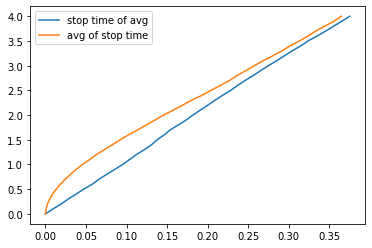

In [8]:
plt.plot(stop_avg_1, boundsB[boundsB>0], labeL="stop time of avg")
plt.plot(stoch, boundsB[boundsB>0], labeL="avg of stop time")
plt.legend()

In [74]:
indb=0
np.argmin(np.abs(tot_err[indb,:] - errs[indb]))

45

In [50]:
pars = give_def_params_discrimination(flip=0, mode = mode)
params, exp_path = check_params_discrimination(pars)
[gamma1, omega1, n1, eta1, kappa1], [gamma0, omega0, n0, eta0, kappa0] = params

mu1 = prob(0.01, b, kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1)[1]

In [80]:
from scipy.special import erfc

In [55]:
timms = times[::100]

In [56]:
erf(1)

0.8427007929497148

In [94]:
def dete(t, b, mu):
    inside = (b + mu*t)/(np.sqrt(mu*t)*2)
    return (1 +  erf(inside))/2

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [116]:
timind =[times[inn] for inn in indis]

6.0

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


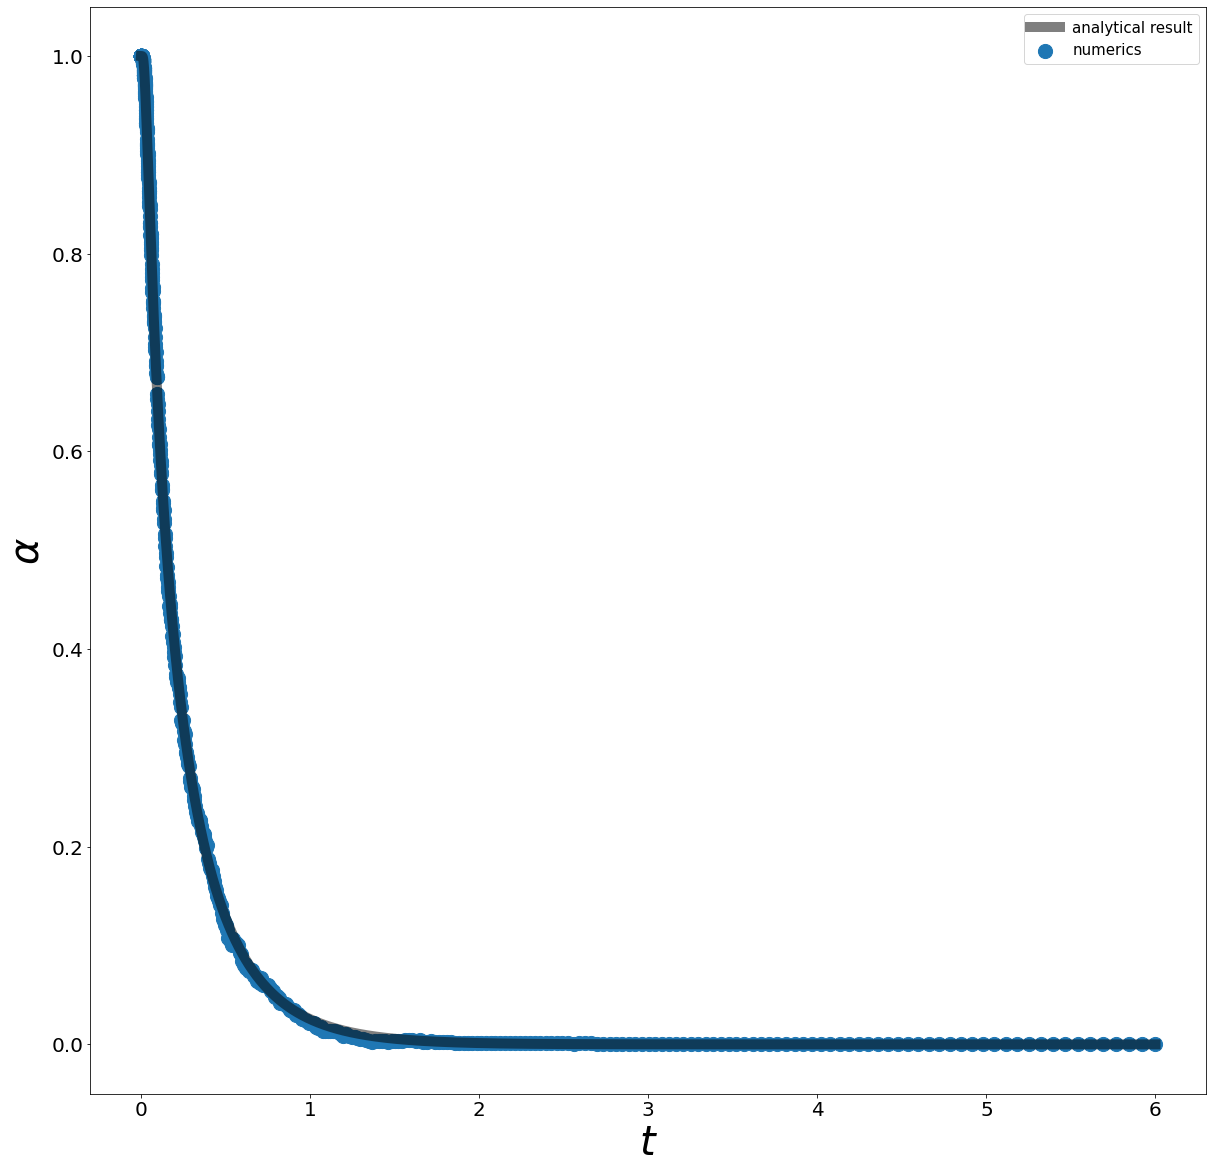

In [133]:
plt.figure(figsize=(20,20))
ax=plt.subplot(111)
ax.scatter(timind,np.abs(alphas[-25,:]), s=200, label="numerics")
ax.plot(timms, 1-np.array([dete(t, -boundsB[-25], mu1) for t in timms]), color="black", linewidth=10, alpha=0.5, label="analytical result")
#ax.set_yscale("log")
ax = plt.subplot(111)
ax.set_xlabel(r'$t$',size=40)
ax.set_ylabel(r'$\alpha$', size=40)
ax.legend(prop={"size":15})
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig(plotdir+"alpha_compa.pdf")

note we don't have enough statistics for t > 3

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


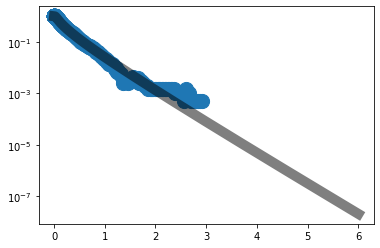

In [127]:
ax=plt.subplot(111)
ax.scatter(timind,np.abs(alphas[-25,:]), s=200)
ax.plot(timms, 1-np.array([dete(t, -boundsB[-25], mu1) for t in timms]), color="black", linewidth=10, alpha=0.5)
ax.set_yscale("log")

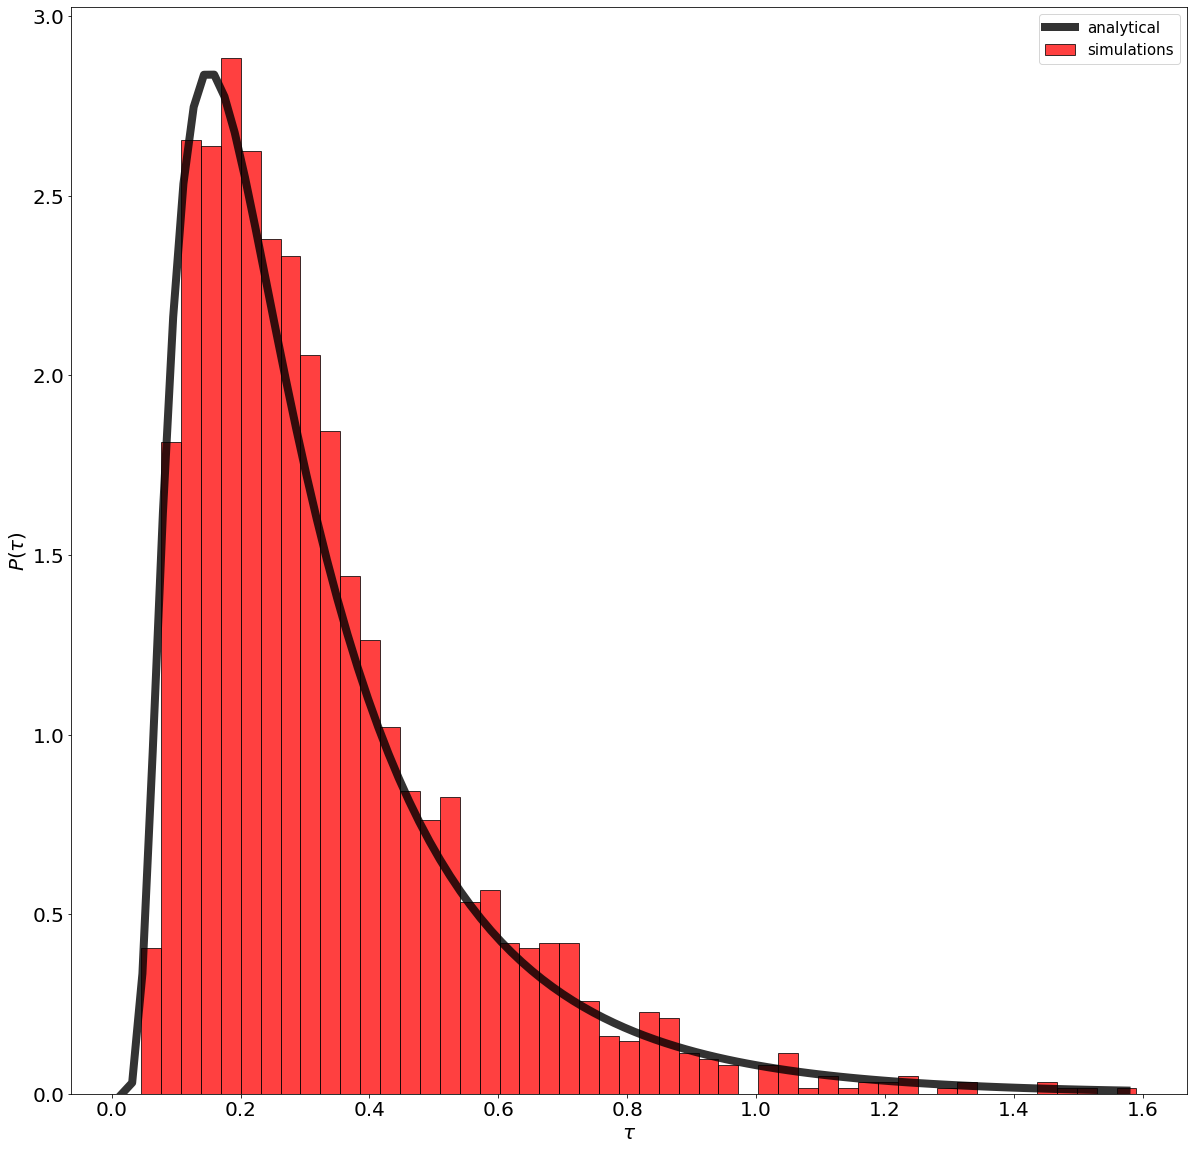

In [51]:
plt.figure(figsize=(20,20))
ax = plt.subplot(111)
indb = -5
ax.bar(timbin1[indb], cons1[indb], width=timbin1[indb][1]-timbin1[indb][0], color="red", alpha=0.75, edgecolor="black",label="simulations")
ax.plot(np.linspace(0,np.max(timbin1[indb]), 100), anals1[indb], linewidth=8, color="black", alpha=0.8, label="analytical")
ax.set_xlabel(r'$\tau$',size=20)
ax.set_ylabel(r'$P(\tau)$', size=20)
ax.legend(prop={"size":15})
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig(plotdir+"damp_compa.pdf")

In [82]:
avg_err_alpha = lambda o: (1-np.exp(-o))/(np.exp(o) - np.exp(-o))
errs = [avg_err_alpha(b) for b in bpos]
times_alpha_to_errB = [timind[np.argmin(np.abs(alphas[indb+len(bneg),:]+betas[len(bneg)-indb+1,:] - errs[indb]))] for indb in range(len(bpos))]

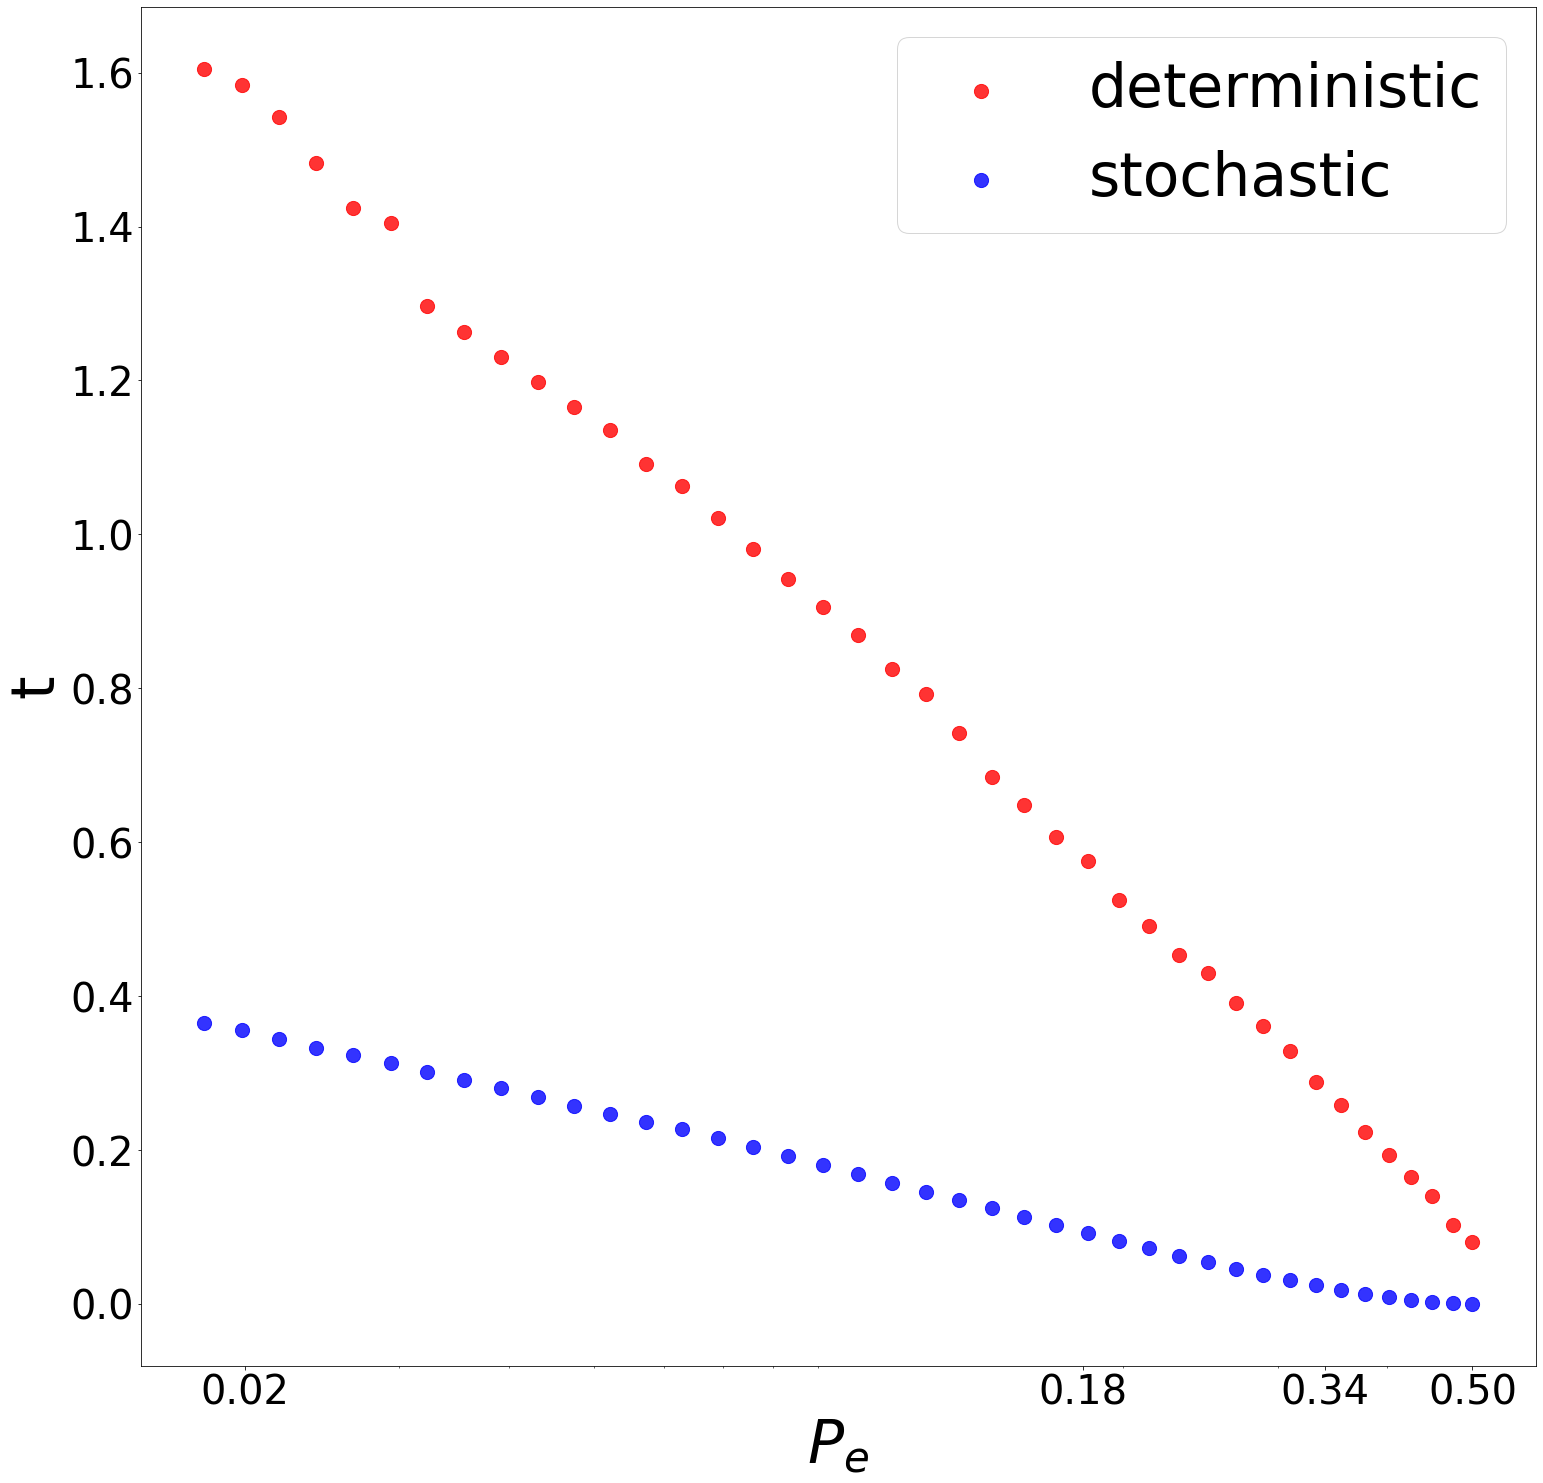

In [84]:

fig = plt.figure(figsize=(25,25))
ax = plt.subplot(111)
lw=10
ax.scatter(errs, times_alpha_to_errB,color="red", alpha=0.8,s=200, label="deterministic")
ax.scatter(errs, stoch ,color="blue",s=200,  alpha=0.8,label="stochastic")
#ax.fill_between(errs, stoch - stoch_std/2, stoch + stoch_std/2, alpha=0.5, color="blue")
ax.set_xscale("log")
ax.set_xticks([np.round(k,2) for k in np.linspace(min(errs),max(errs),4)])
ax.set_xlabel(r'$P_e$', size=LS)
ax.tick_params(axis='both', which='major', labelsize=TS)
ax.set_ylabel("t", size=LS)
ax.legend(prop={"size":LS})
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.savefig(plotdir+"damp_adaptive_vs_det.pdf")


In [ ]:
ax.plot(errs, stoch, color="blue", linewidth=4, label="stochastic")
ax.fill_between(errs, stoch - stoch_std/2, stoch + stoch_std/2, alpha=0.5, color="blue")
ax.set_xscale("log")
ax.set_xlabel("Mean error", size=20)
ax.set_ylabel("t", size=20)
ax.legend()

ax = plt.subplot(122)
ax.plot(errs, times_to_errs/stoch, linewidth=4, color="green")
ax.plot(errs, np.ones(len(stoch))*4,  '--', linewidth=4,color="black")
ax.set_xlabel("Mean error", size=20)
ax.set_ylabel(r'$\frac{t_{det}}{t_{stoch}}$', size=20)

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()